In [1]:
import os
from tqdm.notebook import tqdm
import numpy as np
import json
from PIL import Image
import matplotlib.pyplot as plt

In [2]:
user_profile = os.environ['HOME']

# Note that you are not allowed to use test data for training.
# set the path to the downloaded data:
data_path = '%s/data/EE148/RedLights2011_Medium' % user_profile

# get sorted list of files: 
file_names = sorted(os.listdir(data_path)) 

# remove any non-JPEG files: 
file_names = [f for f in file_names if '.jpg' in f]

# load splits: 
split_path = '%s/data/EE148/hw02_splits' % user_profile
file_names_train = np.load(os.path.join(split_path,'file_names_train.npy'))
file_names_test = np.load(os.path.join(split_path,'file_names_test.npy'))

# set a path for saving predictions:
preds_path = '%s/data/EE148/hw02_preds' % user_profile
os.makedirs(preds_path, exist_ok=True) # create directory if needed

# Set this parameter to True when you're done with algorithm development:
done_tweaking = False

In [3]:
def show_img(I, img_name, rect_list):
#     I = Image.open(os.path.join(data_path,img_name))
#     I = np.asarray(I)
    # Create figure and axes
    fig, ax = plt.subplots()
    fig.set_figwidth(5)
    fig.set_figheight(5)
    # Display the image
    ax.imshow(I)
    for rect in rect_list:
        tl_row, tl_col, br_row, br_col = rect
        # Create a Rectangle patch
        rect = patches.Rectangle((tl_col-1, tl_row-1), br_col-tl_col, br_row-tl_row,
                                 linewidth=1, edgecolor='r', facecolor='none')
        
        # Add the patch to the Axes
        ax.add_patch(rect)
    plt.title(img_name)
    plt.show()
    #plt.savefig(img_name)

In [4]:
def get_ref_red_lights():
    """Get some reference images of red lights from the first image."""
    coords_dict = {
        0: [[154, 316, 171, 323], [180, 67, 205, 79], [192, 419, 207, 428]],
        1: [[175, 322, 197, 332], [215, 44, 245, 59], [222, 400, 245, 410]],
        2: [[232, 121, 255, 129], [199, 278, 219, 292], [202, 335, 220, 342], [243, 414, 265, 423]],
        9: [[13, 122, 85, 174], [25, 320, 94, 350], [174, 600, 241, 629]]
    }    
    ref = []
    for i in coords_dict:
        img_name = file_names[i]
        I = Image.open(os.path.join(data_path,img_name))
        I = np.asarray(I)
        for coords_list in coords_dict[i]:
            tl_row, tl_col, br_row, br_col = top_row, left_col, bot_row, right_col = coords_list
            obj = I[top_row:bot_row, left_col:right_col, :]
            show_img(obj, img_name, [])
            ref.append(obj)
    return ref

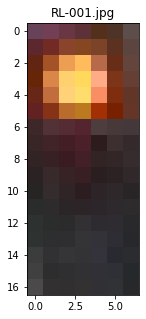

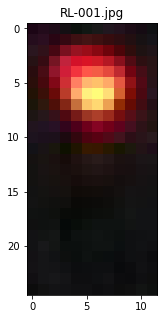

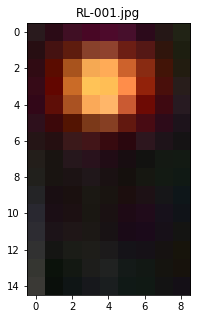

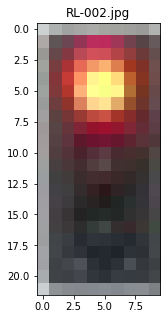

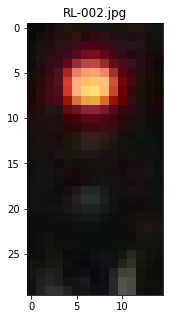

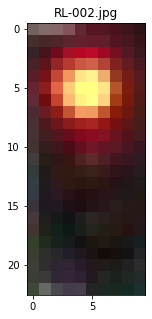

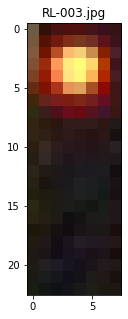

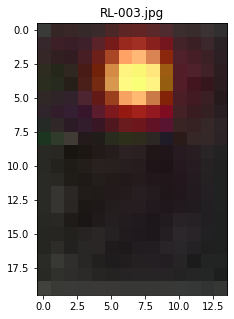

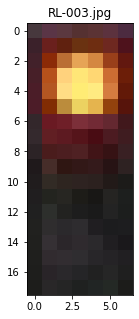

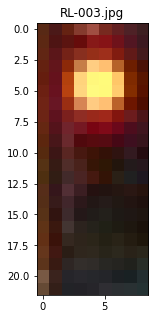

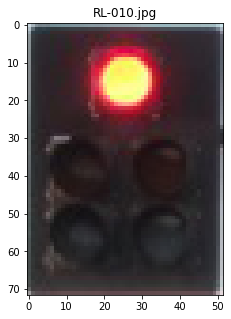

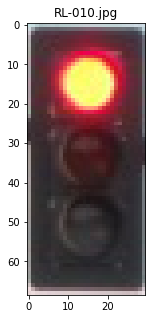

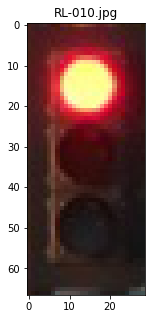

In [5]:
templates = get_ref_red_lights()

In [6]:
def compute_convolution(I, T, stride=None):
    '''
    This function takes an image <I> and a template <T> (both numpy arrays) 
    and returns a heatmap where each grid represents the output produced by 
    convolution at each location. You can add optional parameters (e.g. stride, 
    window_size, padding) to create additional functionality. 
    '''
    (n_rows,n_cols,n_channels) = np.shape(I)

    '''
    BEGIN YOUR CODE
    '''
#     heatmap = np.zeros((n_rows, n_cols))
#     T_height, T_width = np.shape(T)
#     for i in tqdm(range(n_rows-T_height)):
#         for j in range(n_cols-T_width):
#             test_I = I[i:i+T_height,j:j+T_width]
#             for test_i in range(T_height):
#                 for test_j in range(T_width):
#                     test_T = np.ones(3)*T[test_i, test_j]
#                     dist = np.dot(test_I[test_i, test_j], test_T)
#                     heatmap_i = i + T_height // 2
#                     heatmap_j = j + T_width // 2
#                     heatmap[heatmap_i, heatmap_j] = np.arccos(dist) / np.pi

    # Replace arccos with faster operation
#     heatmap = np.zeros((n_rows, n_cols))
#     T_height, T_width = np.shape(T)
#     for i in tqdm(range(n_rows-T_height)):
#         for j in range(n_cols-T_width):
#             test_I = I[i:i+T_height,j:j+T_width]
#             for test_i in range(T_height):
#                 for test_j in range(T_width):
#                     test_T = np.ones(3)*T[test_i, test_j]
#                     dist = (np.dot(test_I[test_i, test_j], test_T) + 1) / 2
#                     heatmap_i = i + T_height // 2
#                     heatmap_j = j + T_width // 2
#                     heatmap[heatmap_i, heatmap_j] = dist
                    
    # Take means of I and T
#     heatmap = np.zeros((n_rows, n_cols))
#     T_height, T_width = np.shape(T)
#     for i in tqdm(range(n_rows-T_height)):
#         for j in range(n_cols-T_width):
#             test_I = I[i:i+T_height,j:j+T_width]
#             mean_test_I = np.mean(test_I, axis=(0,1))
#             mean_test_T = np.ones(3)*np.mean(T)
#             dist = (np.dot(mean_test_I, mean_test_T) + 1) / 2
#             heatmap_i = i + T_height // 2
#             heatmap_j = j + T_width // 2
#             heatmap[heatmap_i, heatmap_j] = np.clip(dist,-1.0,1.0)

    # Look at specific I coordinate, but take mean of T
#     heatmap = np.zeros((n_rows, n_cols))
#     T_height, T_width = np.shape(T)
#     for i in tqdm(range(n_rows-T_height)):
#         for j in range(n_cols-T_width):
#             heatmap_i = i + T_height // 2
#             heatmap_j = j + T_width // 2
#             test_I = I[heatmap_i, heatmap_j]
#             mean_test_T = np.ones(3)*np.mean(T)
#             dist = (np.dot(test_I, mean_test_T) + 1) / 2
#             heatmap[heatmap_i, heatmap_j] = np.clip(dist,-1.0,1.0)
            
    # Look at 3-channel T
#     heatmap = np.zeros((n_rows, n_cols))
#     T_height, T_width, num_channels = np.shape(T)
#     mean_test_T = np.mean(T, axis=(0,1))
#     for i in tqdm(range(n_rows-T_height)):
#         for j in range(n_cols-T_width):
#             heatmap_i = i + T_height // 2
#             heatmap_j = j + T_width // 2
#             test_I = I[heatmap_i, heatmap_j]
#             dist = get_dist(test_I, mean_test_T)
#             heatmap[heatmap_i, heatmap_j] = dist
    
    # Add stride to kernel
    heatmap = np.zeros((n_rows, n_cols))
    T_height, T_width, num_channels = np.shape(T)
    mean_test_T = np.mean(T, axis=(0,1))
    for i in tqdm(range(0, n_rows-T_height, 2)):
        for j in range(0, n_cols-T_width, 2):
            heatmap_i = i + T_height // 2
            heatmap_j = j + T_width // 2
            test_I = I[heatmap_i, heatmap_j]
            dist = get_dist(test_I, mean_test_T)
            heatmap[heatmap_i, heatmap_j] = dist
    '''
    END YOUR CODE
    '''

    return heatmap

In [7]:
def get_dist(v1, v2):
    """Get the angle between two vectors, and confert to a distance between 0 and 1."""
    if np.linalg.norm(v1) > 0 and np.linalg.norm(v2) > 0:
        unit_vector_1 = v1 / np.linalg.norm(v1)
        unit_vector_2 = v2 / np.linalg.norm(v2)
        dot_product = np.dot(unit_vector_1, unit_vector_2)
        return np.clip(np.arccos(dot_product)/np.pi,0,1.0)
    else:
        return np.random.rand()

In [8]:
def predict_boxes(heatmap):
    '''
    This function takes heatmap and returns the bounding boxes and associated
    confidence scores.
    '''
    output = []

    '''
    BEGIN YOUR CODE
    '''
    
    (n_rows,n_cols) = np.shape(heatmap)
    box_dims = [(100, 50), (20, 10), (10, 5)]
    threshold = 10

    for box_dim in box_dims:
        box_height, box_width = box_dim
        for i in range(n_rows - box_height):
            for j in range(n_cols - box_width):
                candidate_box = heatmap[i:i+box_height, j:j+box_width]
                score = np.mean(candidate_box)
                if score > threshold:
                    tl_row = i
                    tl_col = j
                    br_row = i + box_height
                    br_col = j + box_width
                    output.append([tl_row,tl_col,br_row,br_col, score])
    plt.imshow(heatmap)
    plt.savefig('heatmap.png') 

    '''
    END YOUR CODE
    '''

    return output

In [9]:
def detect_red_light_mf(I):
    '''
    This function takes a numpy array <I> and returns a list <output>.
    The length of <output> is the number of bounding boxes predicted for <I>. 
    Each entry of <output> is a list <[row_TL,col_TL,row_BR,col_BR,score]>. 
    The first four entries are four integers specifying a bounding box 
    (the row and column index of the top left corner and the row and column 
    index of the bottom right corner).
    <score> is a confidence score ranging from 0 to 1. 

    Note that PIL loads images in RGB order, so:
    I[:,:,0] is the red channel
    I[:,:,1] is the green channel
    I[:,:,2] is the blue channel
    '''

    '''
    BEGIN YOUR CODE
    '''
    output = []
    for T in templates:

        # You may use multiple stages and combine the results
        heatmap = compute_convolution(I, T)
        print('computed heatmap')
        output.extend(predict_boxes(heatmap))
        print('computed output')

    '''
    END YOUR CODE
    '''

    for i in range(len(output)):
        assert len(output[i]) == 5
        assert (output[i][4] >= 0.0) and (output[i][4] <= 1.0)

    return output

In [ ]:
'''
Make predictions on the training set.
'''
preds_train = {}
for i in tqdm(range(len(file_names_train))):

    # read image using PIL:
    I = Image.open(os.path.join(data_path,file_names_train[i]))

    # convert to numpy array:
    I = np.asarray(I)

    preds_train[file_names_train[i]] = detect_red_light_mf(I)
    print('hello')
    print(preds_train[file_names_train[i]])
    show_img(file_names_train[i], preds_train[file_names_train[i]])

# save preds (overwrites any previous predictions!)
with open(os.path.join(preds_path,'preds_train.json'),'w') as f:
    json.dump(preds_train,f)

  0%|          | 0/283 [00:00<?, ?it/s]

  0%|          | 0/232 [00:00<?, ?it/s]

computed heatmap
computed output


  0%|          | 0/228 [00:00<?, ?it/s]

computed heatmap
computed output


  0%|          | 0/233 [00:00<?, ?it/s]

computed heatmap
computed output


  0%|          | 0/229 [00:00<?, ?it/s]

computed heatmap
computed output


  0%|          | 0/225 [00:00<?, ?it/s]

computed heatmap


In [ ]:
for i in range(10):
    show_img(file_names_train[i], [])
